In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data = {
    'time': np.arange(0, 1000, 0.01),
    'acceleration': np.random.normal(0, 1, 100000) + np.sin(np.arange(0, 1000, 0.01) * 2 * np.pi * 10),
    'noise': np.random.normal(0, 0.5, 100000)
}


In [21]:
data

{'time': array([0.0000e+00, 1.0000e-02, 2.0000e-02, ..., 9.9997e+02, 9.9998e+02,
        9.9999e+02]),
 'acceleration': array([ 1.16009579, -0.25767471, -0.39212771, ..., -2.04292209,
         0.49990568,  0.65968027]),
 'noise': array([ 0.9029843 , -0.15092037,  0.41166984, ..., -0.90681886,
        -0.88881212,  0.17332027])}

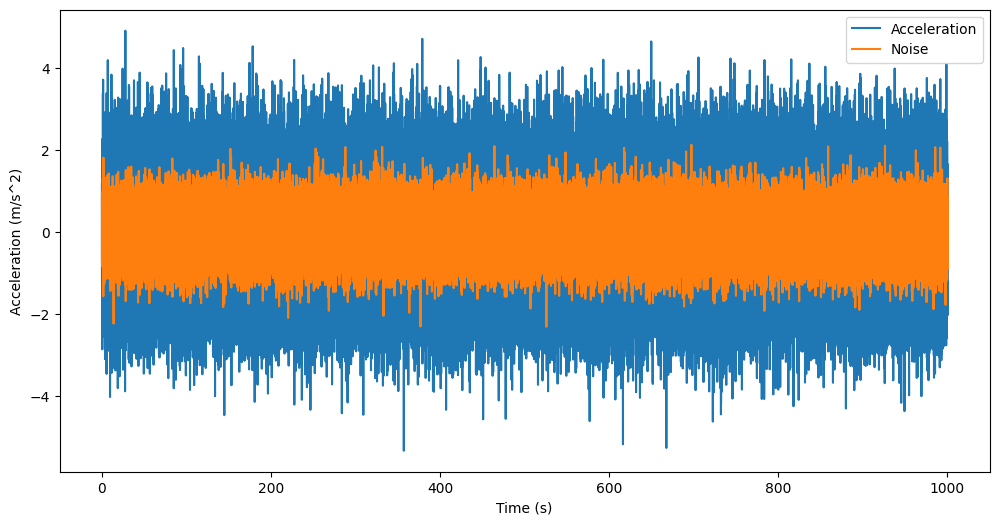

In [22]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['acceleration'], label='Acceleration')
plt.plot(data['time'], data['noise'], label='Noise')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.show()

In [23]:
peak_amplitude = np.max(np.abs(data['acceleration']))
print("Peak Amplitude:", peak_amplitude)

Peak Amplitude: 5.341956224237812


In [24]:
from scipy.fft import fft

freq_content = fft(data['acceleration'])
freq_content = np.abs(freq_content)
print("Frequency Content:", freq_content)

Frequency Content: [ 29.02964995 180.30913228 300.21036124 ... 372.85885015 300.21036124
 180.30913228]


In [25]:
snr = peak_amplitude / np.std(data['noise'])
print("SNR:", snr)

SNR: 10.648408315726074


In [31]:
# Define the thresholds
peak_amplitude_threshold = 3.0  # m/s^2
snr_threshold = 5.0

In [32]:
# Define the classification function
def classify_seismic_signal(peak_amplitude, snr):
    if peak_amplitude > peak_amplitude_threshold and snr > snr_threshold:
        return "Quake"
    else:
        return "Noise"

In [33]:
# Classify the seismic signal
classification = classify_seismic_signal(peak_amplitude, snr)

In [34]:
print("Classification:", classification)

Classification: Quake
